# Multi-objective Optimization using Pymoo Library

Without any loss of generality an optimization problem can be defined by:

\begin{align}
\begin{split}
\min \quad& f_{m}(x) \quad \quad \quad \quad m = 1,..,M  \\[4pt]
\text{s.t.}   \quad& g_{j}(x) \leq 0  \quad \; \; \,  \quad j = 1,..,J \\[2pt]
\quad& h_{k}(x) = 0        \quad  \; \; \quad k = 1,..,K \\[4pt]
\quad& x_{i}^{L} \leq x_{i} \leq x_{i}^{U}  \quad i = 1,..,N \\[2pt]
\quad& x \in \Omega
\end{split}
\end{align}

where xi represents the i-th variable to be optimized, xLi and xUi its lower and upper bound, fm the m-th objective function, gj the j−th inequality constraint and hk the k-th equality constraint.

The objective function(s) f are supposed to be minimized by satisfying all equality and inequality constraints. If a specific objective function is maximized (maxfi), one can redefine the problem to minimize its negative value (min−fi).

Instead of starting coding your problem immediately, it is recommendable to first think about the mathematical problem formulation. Doing so makes you being aware of the complete optimization problem. This also helps you to identify the challenging facets of your optimization problem and, thus, to select a suitable algorithm. In this guide, we will demonstrate an example of a multi-objective problem, use pymoo to obtain a solution set, and theoretically derive the optimum for verification purposes.

If you have some experience solving optimization problems, the following might already be apparent to you. However, if you are new to optimization, thinking about your problem’s characteristics is vital. In the following a few common facts and challenges to consider when intending to solve a (real-world) optimization problem are discussed:

Variable Types. The variables span the search space Ω of your optimization problem. Thus, the type of variables is an essential aspect of the problem to be paid attention to. Different variables types, such as continuous, discrete/integer, binary, or permutation, define the characteristics of the search space. In some cases, the variable types might be even mixed, which increases the complexity further.

Number of Variables. Not only the type but also the number of variables (N) is essential. For either a very small or large number, different algorithms are known to work more efficiently. You can imagine that solving a problem with only ten variables is fundamentally different from solving one with a couple of thousand. For large-scale optimization problems, even the second-order derivate becomes computationally very expensive, and efficiently handling the memory plays a more important role.

Number of Objectives. Some optimization problems have more than one conflicting objective (M>1) to be optimized. Before researchers have investigated multi-objective optimization, single-objective problems were the main focus. Single-objective optimization is only a particular case where M=1. In multi-objective optimization, the solution’s domination relation generalizes the comparison of two scalars in single-objective optimization. Moreover, having more than one dimension in the objective space, the optimum (most of the time) consists of a set of non-dominated solutions. Because a set of solutions should be obtained, population-based algorithms have mainly been used as solvers.

Constraints. Optimization problems have two types of constraints, inequality (g) and equality (h) constraints. From an end-user perspective, constraints have a priority over objective values. No matter how good the solution’s objectives are, it is considered infeasible if it turns out to violate just a single constraint. Constraints can have a big impact on the complexity of the problem. For instance, if only a few islands in the search space are feasible or a large number of constraints (|J|+|K|) need to be satisfied. For genetic algorithms satisfying equality constraints can be rather challenging. Thus, this needs to be addressed differently, for instance, by mapping the search space to a utility space where the equality constraints are always satisfied or injecting the knowledge of the equality constraint through customization.

Multi-modality. Most aspects discussed so far are most likely known or to be relatively easy to define. However, the nature of the fitness landscape is less obvious bet yet essential to be aware of. In the case of multi-modal fitness landscapes, optimization becomes inevitably more difficult due to the existence of a few or even many local optima. For the solution found, one must always ask if the method has explored enough regions in the search space to maximize the probability of obtaining the global optimum. A multi-modal search space quickly shows the limitation of local search, which can easily get stuck.

Differentiability. A function being differentiable implies the first or even second-order derivative can be calculated. Differentiable functions allow gradient-based optimization methods to be used, which can be a great advantage over gradient-free methods. The gradient provides a good indication of what direction shall be used for the search. Most gradient-based algorithms are point-by-point based and can be highly efficient for rather unimodal fitness landscapes. However, in practice, often functions are non-differentiable, or a more complicated function requires a global instead of a local search. The research field addressing problems without knowing their mathematical optimization is also known as black-box optimization.

Evaluation Time. Many optimization problems in practice consist of complicated and lengthy mathematical equations or domain-specific software to be evaluated. The usage of third-party software often results in a computationally expensive and time-consuming function for evaluating objectives or constraints. For those types of problems, the algorithm’s overhead for determining the next solutions to be evaluated is often neglectable. A commercial software performing an evaluation often comes with various more practical issues such as distributed computing, several instances to be used in parallel and software license, and the software’s possible failure for specific design variable combinations.

Uncertainty. Often it is assumed that the objective and constraint functions are of a deterministic manner. However, if one or multiple target functions are nondeterministic, this introduces noise or also referred to as uncertainty. One technique to address the underlying randomness is to repeat the evaluation for different random seeds and average the resulting values. Moreover, the standard deviation derived from multiple evaluations can be utilized to determine the performance and the reliability of a specific solution. In general, optimization problems with underlying uncertainty are investigated by the research field called stochastic optimization.

Of course, this shall not be an exhaustive list of problem characteristics but rather an idea of how fundamentally different optimization problems are. Being aware of possible challenges, one can make better decisions regarding a method and its suitability. In this tutorial, solving a constrained bi-objective optimization problem is demonstrated. This, and your problem’s characteristics, shall help you to use pymoo as a toolbox to tackle your optimization problem.

In the following, we investigate exemplarily a bi-objective optimization with two constraints. We have tried to select a suitable optimization problem with enough complexity for demonstration purposes, but not too difficult to lose track of the overall idea.

As already discussed in the Preface, let an optimization problem be defined by:

\begin{align}
\begin{split}
\min \quad& f_{m}(x) \quad \quad \quad \quad m = 1,..,M  \\[4pt]
\text{s.t.}   \quad& g_{j}(x) \leq 0  \quad \; \; \,  \quad j = 1,..,J \\[2pt]
\quad& h_{k}(x) = 0        \quad  \; \; \quad k = 1,..,K \\[4pt]
\quad& x_{i}^{L} \leq x_{i} \leq x_{i}^{U}  \quad i = 1,..,N \\[2pt]
\quad& x \in \Omega
\end{split}
\end{align}

The the example problem to be solved in this getting started guide is given by:

\begin{align}
\begin{split}
\min \;\; & f_1(x) = 100 \,(x_1^2 + x_2^2) \\
\max \;\; & f_2(x) = -(x_1-1)^2 - x_2^2 \\[1mm]
\text{s.t.} \;\; & g_1(x) = 2 \, (x_1 - 0.1) \, (x_1 - 0.9) \leq 0\\
& g_2(x) = 20 \, (x_1 - 0.4) \, (x_1 - 0.6) \geq 0\\[1mm]
& -2 \leq x_1 \leq 2 \\
& -2 \leq x_2 \leq 2\\[1mm]
& x \in \mathbb{R}
\end{split}
\end{align}

The problem consists of two objectives (M=2) where f1(x) is minimized and f2(x) maximized. The optimization is subject to two inequality constraints (J=2) where g1(x) is formulated as a less than and g2(x) as a greater than constraint. The problem is defined with respect to two variables (N=2), x1 and x2, both in the range [−2,2]. The problem does not contain any equality constraints (K=0).

Let us analyze where the Pareto-optimal solutions have to lie. The first objective f1 is minimized at (0,0), whereas the second object f2 at (1,0). Because both functions are of quadratic nature, the optimum is given by a straight line between the two optima. This means all Pareto-optimal solutions (ignoring the constraints for now) have in common that x2=0 and x1∈(0,1). The first constraint only relies on x1 and is satisfied if x1∈(0.1,0.9). The second constraint g2 is satisfied for x1∈(0.4,0.6). This means analytically, the pareto-optimal set is given by PS={(x1,x2)|(0.1≤x1≤0.4)∨(0.6≤x1≤0.9)∧x2=0}.

The figure below shows the problem’s functions in the design space and might help to see the relationship between the functions intuitively. The contour lines of the objective function f1(x) is represented by a solid and f2(x) by a dashed line. The constraints g1(x) and g2(x) are parabolas which intersect the x1-axis at (0.1,0.9) and (0.4,0.6). A thick orange line illustrates the Pareto-optimal set. When considering both constraints together, the Pareto-set shown in orange is split into two parts as analytically derived above.

## Setup

In [ ]:
!pip install -q pymoo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation
from pymoo.factory import get_termination
from pymoo.optimize import minimize
from pymoo.decomposition.asf import ASF
from pymoo.mcdm.pseudo_weights import PseudoWeights
from pymoo.util.misc import stack
from pymoo.optimize import minimize
from pymoo.indicators.hv import Hypervolume
from pymoo.util.running_metric import RunningMetric
from pymoo.util.running_metric import RunningMetric
from pymoo.indicators.igd import IGD
from pymoo.indicators.igd_plus import IGDPlus

## A Constrained Bi-objective Optimization Problem

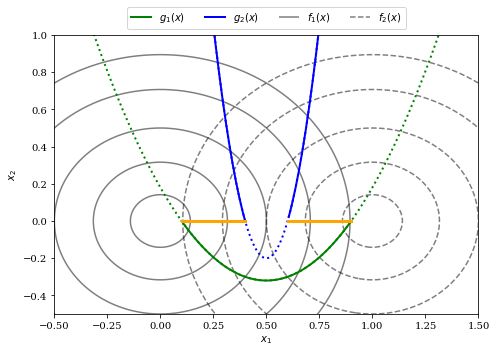

In [ ]:
X1, X2 = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))

F1 = X1**2 + X2**2
F2 = (X1-1)**2 + X2**2
G = X1**2 - X1 + 3/16

G1 = 2 * (X1[0] - 0.1) * (X1[0] - 0.9)
G2 = 20 * (X1[0] - 0.4) * (X1[0] - 0.6)

plt.rc('font', family='serif')

levels = [0.02, 0.1, 0.25, 0.5, 0.8]
plt.figure(figsize=(7, 5))
CS = plt.contour(X1, X2, F1, levels, colors='black', alpha=0.5)
CS.collections[0].set_label("$f_1(x)$")

CS = plt.contour(X1, X2, F2, levels, linestyles="dashed", colors='black', alpha=0.5)
CS.collections[0].set_label("$f_2(x)$")

plt.plot(X1[0], G1, linewidth=2.0, color="green", linestyle='dotted')
plt.plot(X1[0][G1<0], G1[G1<0], label="$g_1(x)$", linewidth=2.0, color="green")

plt.plot(X1[0], G2, linewidth=2.0, color="blue", linestyle='dotted')
plt.plot(X1[0][X1[0]>0.6], G2[X1[0]>0.6], label="$g_2(x)$",linewidth=2.0, color="blue")
plt.plot(X1[0][X1[0]<0.4], G2[X1[0]<0.4], linewidth=2.0, color="blue")

plt.plot(np.linspace(0.1,0.4,100), np.zeros(100),linewidth=3.0, color="orange")
plt.plot(np.linspace(0.6,0.9,100), np.zeros(100),linewidth=3.0, color="orange")

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

Next, we derive the Pareto-front by mapping the Pareto-set to the objective space. The Pareto-front equation is based on f2 depending on the variable of f1. We know that at the optimum x2=0 which means we can simplify the objective functions to f1(x)=100x21 and f2(x)=−(x1−1)2. The first objective f1 can be reformulated to x1=f1100−−−√ and then be put into the second objective which results in

$$f_2 = -\left(\sqrt{\frac{f_1}{100}}-1\right)^2$$

The equation defines the shape, however, next all possible values for f1 need to be defined. As shown before the Pareto-set is defined for (0.1≤x1≤0.4)∨(0.6≤x1≤0.9)∧x2=0. If we plug in the values for x1 into f1 we get the points of interest [1,16] and [36,81]. Thus the Pareto-front is given by:

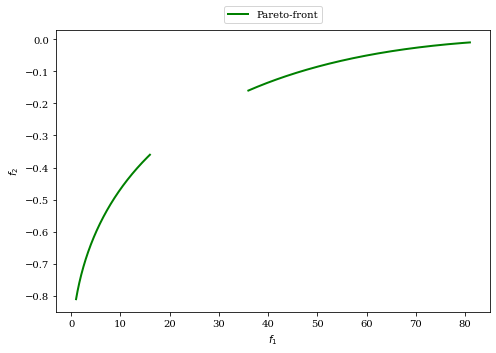

In [ ]:
plt.figure(figsize=(7, 5))

f2 = lambda f1: - ((f1/100) ** 0.5 - 1)**2
F1_a, F1_b = np.linspace(1, 16, 300), np.linspace(36, 81, 300)
F2_a, F2_b = f2(F1_a), f2(F1_b)

plt.rc('font', family='serif')
plt.plot(F1_a,F2_a, linewidth=2.0, color="green", label="Pareto-front")
plt.plot(F1_b,F2_b, linewidth=2.0, color="green")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

Researchers have developed all kinds of test problems and derived their optima from designing and comparing suitable optimization algorithms. However, deriving the Pareto-set and Pareto-front from a mathematical problem formulation can become quite challenging for more complicated problems or not even be possible. Also, not all algorithms can be put into a math equation and might be of a black-box nature. Thus, we use optimization algorithms to find (near-optimal) solutions using well-benchmarked algorithms.

## Find a Solution Set using Multi-objective Optimization

Most optimization frameworks commit to either minimize or maximize all objectives and to have only ≤ or ≥ constraints. In pymoo, each objective function is supposed to be minimized, and each constraint needs to be provided in the form of ≤0.

Thus, we need to multiple an objective that is supposed to be maximized by −1 and minimize it. This results in minimizing −f2(x) instead of maximizing f2(x).

Moreover, the inequality constraints need to be formulated as less than zero (≤0) constraint. For this reason, g2(x) is multiplied by −1 in order to flip inequality relation. Also, we recommend the normalization of constraints to make them operating on the same scale and giving them equal importance. For g1(x), the coefficient results in 2⋅(−0.1)⋅(−0.9)=0.18 and for g2(x) in 20⋅(−0.4)⋅(−0.6)=4.8, respectively. We achieve normalization of constraints by dividing g1(x) and g2(x) by its corresponding coefficient.

After these reformulations the problem to be implemented is given by:

\begin{align}
\begin{split}
\min \;\; & f_1(x) = 100 \, (x_1^2 + x_2^2) \\
\min \;\; & f_2(x) = (x_1-1)^2 + x_2^2 \\[1mm]
\text{s.t.} \;\; & g_1(x) = 2 \, (x_1 - 0.1) \, (x_1 - 0.9)  \, /  \,  0.18 \leq 0\\
& g_2(x) = - 20 \, (x_1 - 0.4) \, (x_1 - 0.6) \,  /  \,  4.8 \leq 0\\[1mm]
& -2 \leq x_1 \leq 2 \\
& -2 \leq x_2 \leq 2\\[1mm]
& x \in \mathbb{R}
\end{split}
\end{align}

### Implement the Problem

After having formulated the problem the right way, we can start implementing it. In this tutorial we the element-wise problem definition, which is one out of three different ways for implementing a problem. We define a new Python objective inheriting from ElementwiseProblem and set the correct attributes, such as the number of objectives (n_obj) and constraints (n_constr) and the lower (xl) and upper bounds (xu). The function being responsible for the evaluation is _evaluate which shall be implemented next. The function’s interface is the parameters x and out. For this element-wise implementation x is a one-dimensional NumPy array of length n_var which represents a single solution to be evaluated. The output is supposed to be written to the dictionary out. The objective values should be written to out["F"] as a list of NumPy array with length of n_obj and the constraints to out["G"] with length of n_constr (if the problem has constraints to be satisfied at all).

In [ ]:
class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


problem = MyProblem()

A problem can be defined in a couple of different ways. Above, the implementation of an element-wise implementation is demonstrated, which means the _evaluate is called for each solution x at a time. Other ways of implementing a problem are vectorized, where x represents a whole set of solutions or a functional and probably more pythonic way by providing for each objective and constraint as a function. For more details, please have a look at the Problem tutorial.

### Initialize an Algorithm

The reason why you became aware of this framework, is probably the existence of an algorithm you like to use. pymoo follows an object oriented approach and, thus, we have to define an algorithm object next. Depending on the optimization problem, different algorithms will perform better or worse on different kind of problems. It is recommendable to first understand the intuition behind an algorithm and then select one which seems to be most suitable for solving your optimization problem. A list of algorithms which are available in pymoo is available here.

In our case, the optimization problem is rather simple, but the aspect of having two objectives and two constraints should be considered. Thus, let us select the well-known multi-objective algorithm NSGA-II. For the majority of algorithms you could either choose the default hyper-parameters or create your own version of the algorithm by modifying them. For instance, for this relatively simple problem we choose a population size of 40 (pop_size=40) and with only 10 (n_offsprings=10) in each generation. Such an implementation is a greedier variant and improves the convergence of simpler optimization problems without major difficulties regarding optimization, such as the existence of local Pareto-fronts. Moreover, we enable a duplicate check (eliminate_duplicates=True), making sure that the mating produces offsprings that are different from themselves and the existing population regarding their design space values.

In [ ]:
algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

The algorithm object contains an implementation of NSGA-II with the custom configuration discussed above. The object can now be used to start an optimization run.

### Define a Termination Criterion

Furthermore, a termination criterion needs to be defined to start the optimization procedure. Most common ways of defining the termination is by limiting the overall number of function evaluations or simply the number of iterations of the algorithm. Moreover, some algorithms already have implemented their own, for instance Nelder-Mead when the simplex becomes degenerated or CMA-ES where a vendor library is used. Because of the simplicity of this problem we use a rather small number of 40 iteration of the algorithm.

In [ ]:
termination = get_termination("n_gen", 40)

### Optimize

Finally, we are solving the problem with the algorithm and termination we have defined. The functional interface uses the minimize method. By default, the minimize performs deep-copies of the algorithm and the termination object which guarantees they are not modified during the function call. This is important to ensure that repetitive function calls with the same random seed end up with the same results. When the algorithm has been terminated, the minimize function returns a Result object.

In [ ]:
res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |      40 |  0.00000E+00 |  2.36399E+01 |       1 |            - |            -
    2 |      50 |  0.00000E+00 |  1.15486E+01 |       1 |  0.00000E+00 |            f
    3 |      60 |  0.00000E+00 |  5.277918607 |       1 |  0.00000E+00 |            f
    4 |      70 |  0.00000E+00 |  2.406068542 |       2 |  1.000000000 |        ideal
    5 |      80 |  0.00000E+00 |  0.908316880 |       3 |  0.869706146 |        ideal
    6 |      90 |  0.00000E+00 |  0.264746300 |       3 |  0.00000E+00 |            f
    7 |     100 |  0.00000E+00 |  0.054063822 |       4 |  0.023775686 |        ideal
    8 |     110 |  0.00000E+00 |  0.003060876 |       5 |  0.127815454 |        ideal
    9 |     120 |  0.00000E+00 |  0.00000E+00 |       6 |  0.085921728 |        ideal
   10 |     130 |  0.00000E+00 |  0.00000E+00 |       7 |  0.015715204 |            f
   11 |     140 |  0.00000E+00 |  0.00000E+00 |       

If the verbose=True, some printouts during the algorithm’s execution are provided. This can very from algorithm to algorithm. Here, we execute NSGA2 on a problem where pymoo has no knowledge about the optimum. Each line represents one iteration. The first two columns are the current generation counter and the number of evaluations so far. For constrained problems, the next two columns show the minimum constraint violation (cv (min)) and the average constraint violation (cv (avg)) in the current population. This is followed by the number of non-dominated solutions (n_nds) and two more metrics which represents the movement in the objective space.

### Visualize

Analyzing the solutions being found by the algorithm is vital. Always a good start is visualizing the solutions to get a grasp of commonalities or if the Pareto-front is known to even check the convergence.

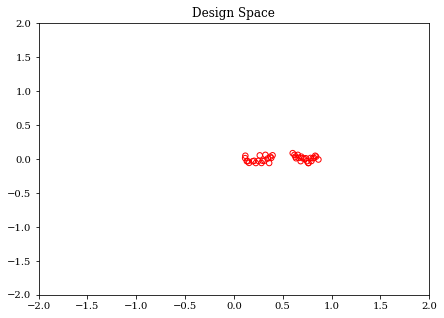

In [ ]:
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()

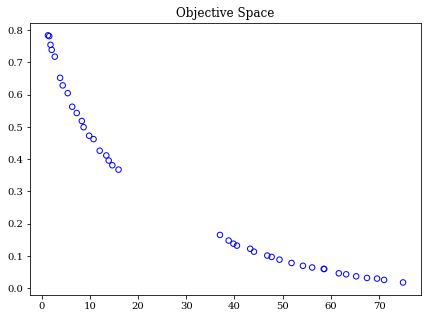

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

## Multi-Criteria Decision Making

Having now obtained a set of non-dominated solutions, one can ask how a decision-maker can nail down the set to only a few or even a single solution. This decision-making process for multi-objective problems is also known as Multi-Criteria Decision Making (MCDM). You should know that the main focus of pymoo lies in the optimization, not the MCDM part. However, the framework offers some rudimentary tools to find an appropriate solution.

The Pareto-optimal solutions obtained from the optimization procedure are given by:

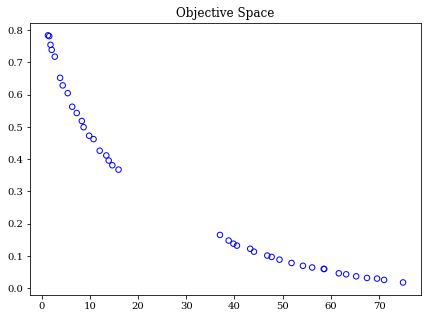

In [ ]:
F = res.F
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

Before we start using any technique, we should note that the objectives have a different scale. What has not been a problem for single-objective optimization because not more than one dimension existed now becomes fundamentally important to consider.

In [ ]:
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [1.3377795039158837, 74.97223429467643]
Scale f2: [0.01809179532919018, 0.7831767823138299]


As one can observe, the lower and upper bounds of the objectives f1 and f2 are very different, and such normalization is required.

> Warning: Without normalization, we are comparing oranges with apples. The first objective will dominate any distance calculation in the objective space because of its larger scale. Handling different scales of objectives is an inherent part of any multi-objective algorithms, and, thus, we need to do the same for post-processing.

A common way is normalizing using the so-called ideal and nadir point. However, for the decision-making purpose here and the sake of generalization, we assume the ideal and nadir points (also referred to as boundary points) and the Pareto-front) are not known. Thus the points can be approximated by:

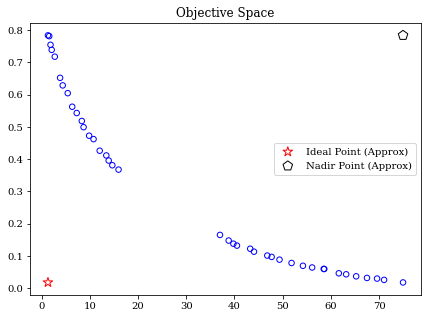

In [ ]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.legend()
plt.show()

Normalizing the obtained objective values regarding the boundary points is relatively simple by:

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


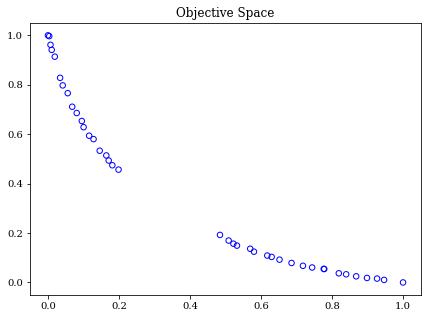

In [ ]:
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

### Compromise Programming

Without going into too much detail in this getting started guide, one way for decision-making is using decomposition functions. They require the definition of weights that reflect the user’s wishes. A vector gives the weights with only positive float numbers summing up to one and a length equal to the number of objectives.

Here for a bi-objective problem, let us assume the first objective is less a bit less important than the second objective by setting the weights to

In [ ]:
weights = np.array([0.2, 0.8])

Next, we choose the decomposition method called Augmented Scalarization Function (ASF), a well-known metric in the multi-objective optimization literature.

In [ ]:
decomp = ASF()

Now let us obtain the best solution regarding the ASF. Because ASF is supposed to be minimized, we choose the minimum ASF values calculated from all solutions. You might be wondering why the weights are not passed directly, but 1/weights. For ASF, different formulations exist, one where the values are divided and one where they are multiplied. In pymoo, we divide, which does not reflect the idea of the user’s criteria. Thus, the inverse needs to be applied. No worries if this is too much detail for now; however, decision-making about decomposition techniques is vital.

In [ ]:
i = decomp.do(nF, 1/weights).argmin()

After having found a solution (i) we can operate on the original scale to represent the results:

In [ ]:
print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))

Best regarding ASF: Point 
i = 21
F = [43.28059434  0.12244878]


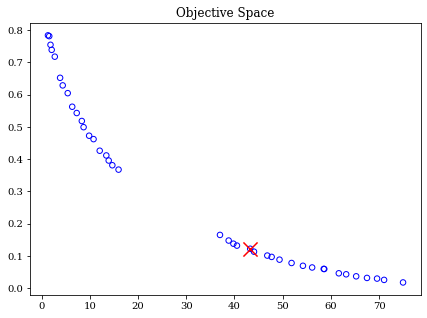

In [ ]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

### Pseudo-Weights

A simple way to chose a solution out of a solution set in the context of multi-objective optimization is the pseudo-weight vector approach proposed in. Respectively, the pseudo weight wi for the i-ith objective function can be calculated by:

\begin{equation}
w_i = \frac{(f_i^{max} - f_i {(x)}) \, /\,  (f_i^{max} - f_i^{min})}{\sum_{m=1}^M (f_m^{max} - f_m (x)) \, /\,  (f_m^{max} - f_m^{min})}
\end{equation}

This equation calculates the normalized distance to the worst solution regarding each objective i. Please note that for non-convex Pareto fronts, the pseudo weight does not correspond to the result of an optimization using the weighted sum. However, for convex Pareto-fronts, the pseudo weights indicate the location in the objective space.



In [ ]:
i = PseudoWeights(weights).do(nF)

Best regarding Pseudo Weights: Point 
i = 39
F = [58.52211061  0.06005482]


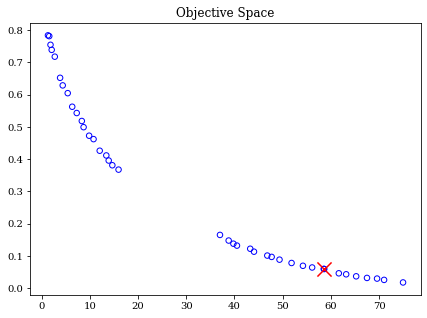

In [ ]:
print("Best regarding Pseudo Weights: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

## Analysis of Convergence

Great! So far, we have executed an algorithm and already obtained a solution set. But let us not stop here without knowing how the algorithm has performed. This will also answer how we should define a termination criterion if we solve the problem again. The convergence analysis shall consider two cases, i) the Pareto-front is not known, or ii) the Pareto-front has been derived analytically, or a reasonable approximation exists.

To further check how close the results match the analytically derived optimum, we have to convert the objective space values to the original definition where the second objective f2 was maximized. Plotting then the Pareto-front shows how close the algorithm was able to converge.

In [ ]:
class MyTestProblem(MyProblem):

    def _calc_pareto_front(self, flatten=True, *args, **kwargs):
        f2 = lambda f1: ((f1/100) ** 0.5 - 1)**2
        F1_a, F1_b = np.linspace(1, 16, 300), np.linspace(36, 81, 300)
        F2_a, F2_b = f2(F1_a), f2(F1_b)

        pf_a = np.column_stack([F1_a, F2_a])
        pf_b = np.column_stack([F1_b, F2_b])

        return stack(pf_a, pf_b, flatten=flatten)

    def _calc_pareto_set(self, *args, **kwargs):
        x1_a = np.linspace(0.1, 0.4, 50)
        x1_b = np.linspace(0.6, 0.9, 50)
        x2 = np.zeros(50)

        a, b = np.column_stack([x1_a, x2]), np.column_stack([x1_b, x2])
        return stack(a,b, flatten=flatten)

problem = MyTestProblem()

For IGD, the Pareto front needs to be known or to be approximated. In our framework, the Pareto front of test problems can be obtained by:

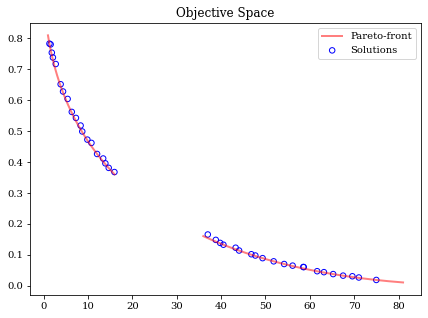

In [ ]:
pf_a, pf_b = problem.pareto_front(use_cache=False, flatten=False)
pf = problem.pareto_front(use_cache=False, flatten=True)

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='b', label="Solutions")
plt.plot(pf_a[:, 0], pf_a[:, 1], alpha=0.5, linewidth=2.0, color="red", label="Pareto-front")
plt.plot(pf_b[:, 0], pf_b[:, 1], alpha=0.5, linewidth=2.0, color="red")
plt.title("Objective Space")
plt.legend()
plt.show()

Whether the optimum for your problem is known or not, we encourage all end-users of pymoo not to skip the analysis of the obtained solution set. Visualizations for high-dimensional objective spaces (in design and/or objective space) are also provided and shown here.

In Part II, we have run the algorithm without storing, keeping track of the optimization progress, and storing information. However, for analyzing the convergence, historical data need to be stored. One way of accomplishing that is enabling the save_history flag, which will store a deep copy of the algorithm object in each iteration and save it in the Result object. This approach is more memory-intensive (especially for many iterations) but has the advantage that any algorithm-dependent variable can be analyzed posteriorly.

A not negligible step is the post-processing after having obtained the results. We strongly recommend not only analyzing the final result but also the algorithm’s behavior. This gives more insights into the convergence of the algorithm.

For such an analysis, intermediate steps of the algorithm need to be considered. This can either be achieved by:

A Callback class storing the necessary information in each iteration of the algorithm.

Enabling the save_history flag when calling the minimize method to store a deep copy of the algorithm’s objective each iteration.

We provide some more details about each variant in our convergence tutorial. As you might have already seen, we have set save_history=True when calling the minmize method in this getting started guide and, thus, will you the history for our analysis. Moreover, we need to decide what metric should be used to measure the performance of our algorithm. In this tutorial, we are going to use Hypervolume and IGD. Feel free to look at our performance indicators to find more information about metrics to measure the performance of multi-objective algorithms.

In [ ]:
res = minimize(problem,
               algorithm,
               ("n_gen", 40),
               seed=1,
               save_history=True,
               verbose=False)

X, F = res.opt.get("X", "F")

hist = res.history
print(len(hist))

40


From the history it is relatively easy to extract the information we need for an analysis.

In [ ]:
n_evals = []             # corresponding number of function evaluations\
hist_F = []              # the objective space values in each generation
hist_cv = []             # constraint violation in each generation
hist_cv_avg = []         # average constraint violation in the whole population

for algo in hist:

    # store the number of function evaluations
    n_evals.append(algo.evaluator.n_eval)

    # retrieve the optimum from the algorithm
    opt = algo.opt

    # store the least contraint violation and the average in each population
    hist_cv.append(opt.get("CV").min())
    hist_cv_avg.append(algo.pop.get("CV").mean())

    # filter out only the feasible and append and objective space values
    feas = np.where(opt.get("feasible"))[0]
    hist_F.append(opt.get("F")[feas])

### Constraint Satisfaction

First, let us quickly see when the first feasible solution has been found:

In [ ]:
k = np.where(np.array(hist_cv) <= 0.0)[0].min()

print(f"At least one feasible solution in Generation {k} after {n_evals[k]} evaluations.")

At least one feasible solution in Generation 0 after 40 evaluations.


Because this problem does not have much complexity, a feasible solution was found right away. Nevertheless, this can be entirely different for your optimization problem and is also worth being analyzed first.

Whole population feasible in Generation 8 after 120 evaluations.


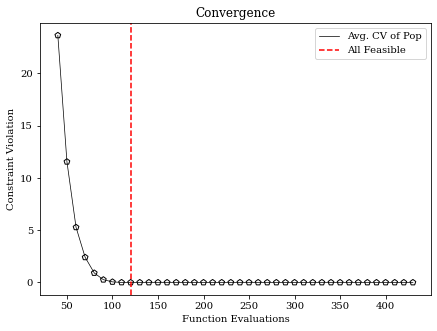

In [ ]:
# replace this line by `hist_cv` if you like to analyze the least feasible optimal solution and not the population
vals = hist_cv_avg

k = np.where(np.array(vals) <= 0.0)[0].min()

print(f"Whole population feasible in Generation {k} after {n_evals[k]} evaluations.")

plt.figure(figsize=(7, 5))
plt.plot(n_evals, vals,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, vals,  facecolor="none", edgecolor='black', marker="p")
plt.axvline(n_evals[k], color="red", label="All Feasible", linestyle="--")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Constraint Violation")
plt.legend()
plt.show()

### Pareto-front is unknown

If the Pareto-front is not known, we can not know if the algorithm has converged to the true optimum or not. At least not without any further information. However, we can see when the algorithm has made most of its progress during optimization and thus if the number of iterations should be less or more. Additionally, the metrics serve to compare two algorithms with each other.

In multi-objective optimization normalization the very important. For that reason, you see below that the Hypervolume is based on a normalized set normalized by the bounds (idea) More details about it will be shown in Part IV.


### Hypvervolume (HV)

Hypervolume is a very well-known performance indicator for multi-objective problems. It is Pareto-compliant and is based on the volume between a predefined reference point and the solution provided. Therefore, hypervolume requires defining a reference point ref_point, which shall be larger than the maximum value of the Pareto front.

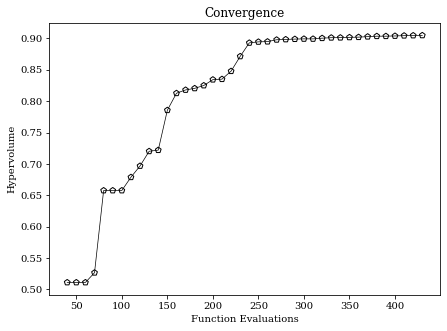

In [ ]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

metric = Hypervolume(ref_point= np.array([1.1, 1.1]),
                     norm_ref_point=False,
                     zero_to_one=True,
                     ideal=approx_ideal,
                     nadir=approx_nadir)

hv = [metric.do(_F) for _F in hist_F]

plt.figure(figsize=(7, 5))
plt.plot(n_evals, hv,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, hv,  facecolor="none", edgecolor='black', marker="p")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.show()

> Note: Hypervolume becomes computationally expensive with increasing dimensionality. The exact hypervolume can be calculated efficiently for 2 and 3 objectives. For higher dimensions, some researchers use a hypervolume approximation, which is not available yet in pymoo.

### Running Metric
Another way of analyzing a run when the true Pareto front is not known is the recently proposed running metric. The running metric shows the difference in the objective space from one generation to another and uses the algorithm’s survival to visualize the improvement. This metric is also being used in pymoo to determine the termination of a multi-objective optimization algorithm if no default termination criteria have been defined.

For instance, this analysis reveals that the algorithm improved from the 4th to the 5th generation significantly.

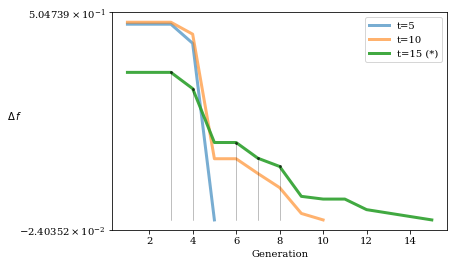

In [ ]:
running = RunningMetric(delta_gen=5,
                        n_plots=3,
                        only_if_n_plots=True,
                        key_press=False,
                        do_show=True)

for algorithm in res.history[:15]:
    running.notify(algorithm)

Plotting until the final population shows the algorithm seems to have more a less converged, and only a slight improvement has been made.

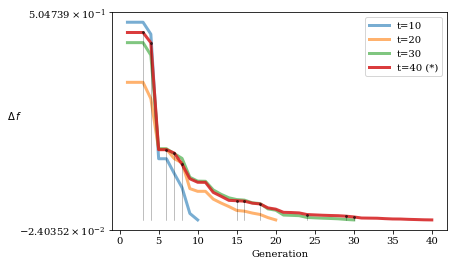

In [ ]:
running = RunningMetric(delta_gen=10,
                        n_plots=4,
                        only_if_n_plots=True,
                        key_press=False,
                        do_show=True)

for algorithm in res.history:
    running.notify(algorithm)

### Pareto-front is known or approximated

**IGD/GD/IGD+/GD+**

The Pareto-front for a problem can either be provided manually or directly implemented in the Problem definition to analyze the run on the fly. Here, we show an example of using the history of the algorithm as an additional post-processing step.

For real-world problems, you have to use an approximation. An approximation can be obtained by running an algorithm a couple of times and extracting the non-dominated solutions out of all solution sets. If you have only a single run, an alternative is to use the obtained non-dominated set of solutions as an approximation. However, the result only indicates how much the algorithm’s progress in converging to the final set.


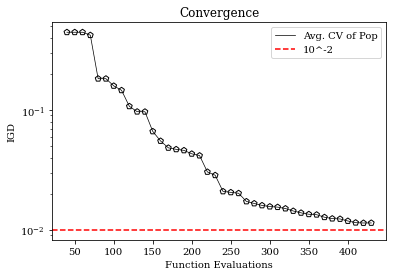

In [ ]:
metric = IGD(pf, zero_to_one=True)

igd = [metric.do(_F) for _F in hist_F]

plt.plot(n_evals, igd,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, igd,  facecolor="none", edgecolor='black', marker="p")
plt.axhline(10**-2, color="red", label="10^-2", linestyle="--")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("IGD")
plt.yscale("log")
plt.legend()
plt.show()

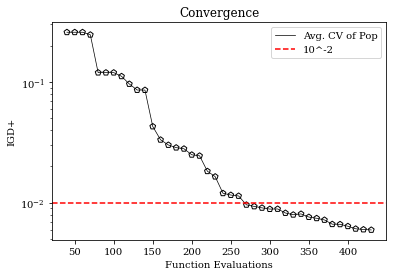

In [ ]:
metric = IGDPlus(pf, zero_to_one=True)

igd = [metric.do(_F) for _F in hist_F]

plt.plot(n_evals, igd,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, igd,  facecolor="none", edgecolor='black', marker="p")
plt.axhline(10**-2, color="red", label="10^-2", linestyle="--")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("IGD+")
plt.yscale("log")
plt.legend()
plt.show()